In [59]:
import os
import sys
import json
import pandas as pd
import re
BASE_DIR = '../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906'

sug_data = []
ques_data = []
cnt =  0
acc_cnt = 0
rejected_cnt = 0
with_cnt = 0
all_cats = set()
for subdir, dirs, files in os.walk(BASE_DIR):
    for file in files:
       
        if 'annotated' in file and 'txt' in file:
            cnt += 1
            if 'Accepted' in subdir:
                acc_cnt += 1
            if 'Rejected' in subdir:
                rejected_cnt += 1
            if 'Withdrawn' in subdir:
                with_cnt += 1
            with open(os.path.join(subdir, file), 'r') as f:
                data = f.read()


                pattern = r'([A-Z]{3}-[A-Z]{3})'
                # Find all matches
                matches = re.findall(pattern, data)

                all_cats.update(matches)


                if 'SUG' in data:
                    # print(os.path.join(subdir, file))
                    print(os.path.join(subdir, file))
                    sug_data.append(data)
                if 'QSN' in data:
                    # print(os.path.join(subdir, file))
                    ques_data.append(data)
    # break

with open('sug_data.txt', 'w') as f:
    f.write('\n'.join(sug_data))

with open('ques_data.txt', 'w') as f:
    f.write('\n'.join(ques_data))

print('Total files:', cnt)
print('Accepted:', acc_cnt)
print('Rejected:', rejected_cnt)
print('Withdrawn:', with_cnt)


../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Accepted/Bya8fGWAZ/Annotated/ICLR2018-Bya8fGWAZ-R1_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Accepted/BJJLHbb0-/Annotated/ICLR2018-BJJLHbb0--R3_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Accepted/H1VjBebR-/Annotated/ICLR2018-H1VjBebR--R3_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Accepted/H1vEXaxA-/Annotated/ICLR2018-H1vEXaxA--R3_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Accepted/H1WgVz-AZ/Annotated/ICLR2018-H1WgVz-AZ-R1_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Withdrawn/Byni8NLHf/Annotated/ICLR2018-Byni8NLHf-R2_annotated.txt
../data/peer-analyze/Peer-Review-Analyze-1.0/Peer-Review-Analyze-1.0/ICLR-2018-906/Withdrawn/Byni8NLHf/Annotate

In [57]:
print(len(all_cats))

all_cats = [x.split('-')[0] for x in all_cats]

print(len(set(all_cats)))

for cat in set(all_cats):
    print(cat)

    # if cat == 'SUG':
    #     print('SUG', all_cats.count(cat))

80
34
WXP
PNF
CLA
WRC
ICW
CMP
ABS
DAT
EMP
MET
IMP
SUB
ELU
FWK
APR
ANA
DFC
NOV
EXP
ACD
TNF
RES
OAL
PDI
VHN
IAF
PTN
LAD
BIB
EXT
INT
RWK
REC
IST


In [54]:
example_string = " This should be moved to the appendix. You should also add a short summary of the TLM architecture to the main paper body.\[[RWK-NEU,BIB-NEG], [SUG]] n\n* "

# Regular expression to extract categories
pattern = r'\b([A-Z]{3}(?:-[A-Z]{3})?)\b'

# Find all matches
matches = re.findall(pattern, example_string)

print(matches)

['TLM', 'RWK-NEU', 'BIB-NEG', 'SUG']


In [60]:
polite_data = pd.read_csv('../data/polite-peer/PolitenessTone-COMBINED.csv')

In [63]:
polite_data['review']

0       Please refer to the paper Discovering structur...
1       One issue of the use of cross task transfer pe...
2       Learning incoherent sparse and low rank patter...
3       However , a disadvantage of the proposed metho...
4       - Comparison with existing clustered MTL metho...
                              ...                        
2495          Changes made by the authors are acceptable.
2496    In my opinion the new version of the paper is ...
2497    This paper presents Power Quality Disturbance ...
2498    The paper presentation is good. \n However, Cr...
2499    In this paper it can be seen that authors hard...
Name: review, Length: 2500, dtype: object

2500
Avg length: 21.2876


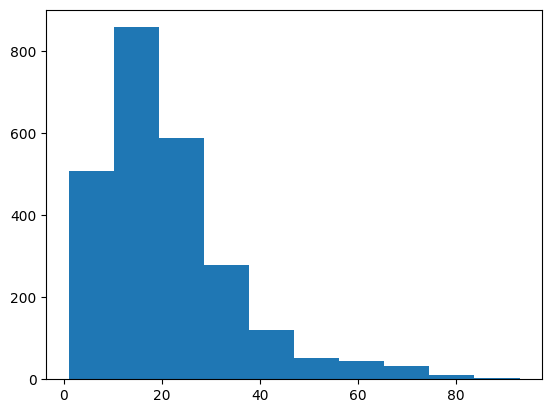

In [66]:
polite_data
from matplotlib import pyplot as plt
import statistics

lengths = [len(str(x).split()) for x in polite_data['review']]
avg = statistics.mean(lengths) 
print(len(lengths))
print(f'Avg length: {avg}')
plt.hist(lengths,  )
plt.show()
